In [1]:
!pip install qutip

You should consider upgrading via the '/home/user1/jupyter/environment/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install krotov

You should consider upgrading via the '/home/user1/jupyter/environment/bin/python -m pip install --upgrade pip' command.


In [3]:
import sys
import os
import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
import krotov
from scipy.fftpack import fft
from scipy.interpolate import interp1d
from qutip.control import *

from scipy.stats import unitary_group
import math as mt

In [4]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1.j], [1.j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

Isigma_z = np.array([[1, 0, 0, 0], 
           [0, -1, 0, 0], 
           [0, 0, 1, 0],
           [0, 0, 0, -1]])

sigma_zI =np.array( [[1, 0, 0, 0], 
           [0, 1, 0, 0], 
           [0, 0, -1, 0],
           [0, 0, 0, -1]])

Isigma_x = np.array([[0, 1, 0, 0], 
           [1, 0, 0, 0], 
           [0, 0, 0, 1],
           [0, 0, 1, 0]])

sigma_xI = np.array([[0, 0, 1, 0], 
           [0, 0, 0, 1], 
           [1, 0, 0, 0],
           [0, 1, 0, 0]])
Isigma_y = np.array([[0, -1.j, 0, 0], 
           [1.j, 0, 0, 0], 
           [0, 0, 0, -1.j],
           [0, 0, 1.j, 0]])

sigma_yI = np.array([[0, 0, -1.j, 0], 
           [0, 0, 0, -1.j], 
           [1.j, 0, 0, 0],
           [0, 1.j, 0, 0]])

sigma_x_x = np.array([[0, 0, 0, 1], 
           [0, 0, 1, 0], 
           [0, 1, 0, 0],
           [1, 0, 0, 0]])

sigma_y_y = np.array([[0, 0, 0, -1], 
           [0, 0, 1, 0], 
           [0, 1, 0, 0],
           [-1, 0, 0, 0]])

sigma_z_z = np.array([[1, 0, 0, 0], 
           [0, -1, 0, 0], 
           [0, 0, -1, 0],
           [0, 0, 0, 1]])
zIsigma_z= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0], 
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
zsigma_zI= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 1, 0, 0, 0, 0, 0, 0], 
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
xsigma_z_z= np.array([[0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0], 
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0]])
zIsigma_x= np.array([[0, 1, 0, 0, 0, 0, 0, 0], 
           [1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0], 
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, -1],
           [0, 0, 0, 0, 0, 0, -1, 0]])
IIsigma_z= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0], 
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
Isigma_zI= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 1, 0, 0, 0, 0, 0, 0], 
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
sigma_zII= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 1, 0, 0, 0, 0, 0, 0], 
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
sigma_z_z_z= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0], 
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
sigma_y_y_y = np.array([[0,  0,  0,  0,  0,  0,  0,  1.j], 
           [0, 0,  0,  0,  0,  0,  -1.j,  0], 
           [0, 0, 0,  0,  0,  -1.j,  0,  0],
           [0,  0,  0,  0,  1.j,  0,  0,  0],
           [0,  0,  0,  -1.j, 0,  0,  0,  0],
           [0,  0,  1.j,  0,  0,  0,  0,  0],
           [0,  1.j,  0,  0,  0,  0,  0,  0],
           [-1.j,  0,  0,  0,  0,  0,  0,  0]])
IIsigma_x= np.array([[0, 1, 0, 0, 0, 0, 0, 0], 
           [1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0], 
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0]])
sigma_x_x_y = np.array([[0,  0,  0,  0,  0,  0,  0,  -1.j], 
           [0, 0,  0,  0,  0,  0,  1.j,  0], 
           [0,  0, 0,  0,  0, -1.j,  0,  0],
           [0,  0,  0,  0,  1.j,  0,  0,  0],
           [0,  0,  0,  -1.j, 0,  0,  0,  0], 
           [0,  0,  1.j,  0,  0,  0,  0,  0],
           [0,  -1.j,  0,  0,  0,  0,  0,  0],
           [1.j,  0,  0,  0,  0,  0,  0,  0]])
sigma_z_z_x= np.array([[0, 1, 0, 0, 0, 0, 0, 0], 
           [1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0], 
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0]])   
sigma_x_z_z= np.array([[0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0], 
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0]])       
Isigma_x_y= np.array([[0, 0, 0, -1.j, 0, 0, 0, 0], 
           [0, 0, 1.j, 0, 0, 0, 0, 0], 
           [0, -1.j, 0, 0, 0, 0, 0, 0],
           [1.j, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, -1.j], 
           [0, 0, 0, 0, 0, 0, 1.j, 0],
           [0, 0, 0, 0, 0, -1.j, 0, 0],
           [0, 0, 0, 0, 1.j, 0, 0, 0]])
sigma_x_x_I=np.array([[0, 0, 0, 0, 0, 0, 1, 0], 
           [0, 0, 0, 0, 0, 0, 0, 1], 
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0], 
           [0, 0, 0, 1, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0]])
sigma_y_y_I = np.array([[0,  0,  0,  0,  0,  0, -1,  0], 
           [0,  0,  0,  0,  0,  0,  0, -1], 
           [0,  0,  0,  0,  1,  0,  0,  0],
           [0,  0,  0,  0,  0,  1,  0,  0],
           [0,  0,  1,  0, 0,  0,  0,  0],
           [0,  0,  0,  1,  0,  0,  0,  0],
           [-1,  0,  0,  0,  0,  0,  0,  0],
           [0, -1,  0,  0,  0,  0,  0,  0]])
sigma_z_z_I= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 1, 0, 0, 0, 0, 0, 0], 
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
sigma_x_I_x=np.array([[0, 0, 0, 0, 0, 1, 0, 0], 
           [0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 1, 0, 0, 0, 0, 0, 0], 
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0]])
sigma_y_I_y = np.array([[0,  0,  0,  0,  0, -1,  0,  0], 
           [0,  0,  0,  0,  1,  0,  0,  0], 
           [0,  0,  0,  0,  0,  0,  0, -1],
           [0,  0,  0,  0,  0,  0,  1,  0],
           [0,  1,  0,  0, 0,  0,  0,  0],
           [-1,  0,  0,  0,  0,  0,  0,  0],
           [0,  0,  0,  1,  0,  0,  0,  0],
           [0,  0, -1,  0,  0,  0,  0,  0]])
sigma_z_I_z= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0], 
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
Isigma_x_I=np.array([[0, 0, 1, 0, 0, 0, 0, 0], 
           [0, 0, 0, 1, 0, 0, 0, 0], 
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0], 
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0]])
sigma_x_I_I=np.array([[0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 1, 0, 0], 
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0]])
IIsigma_y = np.array([[0,  -1.j,  0,  0,  0,  0,  0,  0], 
           [1.j,  0,  0,  0,  0,  0,  0,  0], 
           [0,  0,  0, -1.j,  0,  0,  0,  0],
           [0,  0, 1.j,  0,  0,  0,  0,  0],
           [0,  0,  0,  0,  0, -1.j,  0,  0],
           [0,  0,  0,  0, 1.j,  0,  0,  0],
           [0,  0,  0,  0,  0,  0,  0, -1.j],
           [0,  0,  0,  0,  0,  0, 1.j,  0]])
sigma_y_I_I = np.array([[0,  0,  0,  0,  -1.j,  0,  0,  0], 
           [0,  0,  0,  0,  0, -1.j,  0,  0], 
           [0,  0,  0,  0,  0,  0, -1.j,  0],
           [0,  0,  0,  0,  0,  0,  0, -1.j],
           [1.j,  0,  0,  0,  0,  0,  0,  0],
           [0,  1.j,  0,  0,  0,  0,  0,  0],
           [0,  0,  1.j,  0,  0,  0,  0,  0],
           [0,  0,  0, 1.j,  0,  0,  0,  0]])
Isigma_y_I = np.array([[0,  0, -1.j,  0,  0,  0,  0,  0], 
           [0,  0,  0, -1.j,  0,  0,  0,  0], 
           [1.j,  0,  0,  0,  0,  0,  0,  0],
           [0,  1.j,  0,  0,  0,  0,  0,  0],
           [0,  0,  0,  0,  0,  0, -1.j,  0],
           [0,  0,  0,  0,  0,  0,  0, -1.j],
           [0,  0,   0,  0, 1.j,  0,  0,  0],
           [0,  0,  0,  0,  0, 1.j,  0,  0]])
Isigma_z_z = np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, -1, 0, 0, 0, 0, 0, 0], 
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0,  1, 0, 0, 0, 0],
           [0, 0, 0, 0,  1, 0, 0, 0], 
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])


In [5]:
def guess_control1(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )

def guess_control2(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )

def guess_control3(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )
def guess_control4(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )
def guess_control5(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )
def guess_control6(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )

In [6]:
def hamiltonian(omega1=1 ,omega2=3, omega3=2, ampl0=0.2, J1=0.047, J2=0.097, J3= 0.028  ):
    H0 = qutip.Qobj((-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I))
    H1 = qutip.Qobj(IIsigma_x)
    H2 = qutip.Qobj(Isigma_x_I)
    H3 = qutip.Qobj(sigma_x_I_I)
    H4 = qutip.Qobj(IIsigma_y)
    H5 = qutip.Qobj(Isigma_y_I)
    H6 = qutip.Qobj(sigma_y_I_I)
 
    #return [H0,[HJ,[H1,guess_control1],[H2,guess_control2]]]
    return [H0,[H1,guess_control1],[H2,guess_control2],[H3,guess_control3],[H4,guess_control4],[H5,guess_control5],[H6,guess_control6]]


H = hamiltonian()

In [7]:
H

[Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
 Qobj data =
 [[-2.828  0.     0.     0.     0.     0.     0.     0.   ]
  [ 0.    -1.116  0.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     0.022  0.     0.     0.     0.     0.   ]
  [ 0.     0.     0.     1.922  0.     0.     0.     0.   ]
  [ 0.     0.     0.     0.    -2.078  0.     0.     0.   ]
  [ 0.     0.     0.     0.     0.     0.022  0.     0.   ]
  [ 0.     0.     0.     0.     0.     0.     0.884  0.   ]
  [ 0.     0.     0.     0.     0.     0.     0.     3.172]],
 [Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 1. 0. 0. 0. 0.]
   [0. 0. 1. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 1. 0. 0.]
   [0. 0. 0. 0. 1. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 0. 1. 0.]],
  <function __main__.guess_control1(t, args, ampl0=0.2)>],
 [Quantum object: dims = [[8], [8]], sh

In [8]:
tlist = np.linspace(0, 700, 7000)

In [9]:
def logical_basis(H):
    H0 = qutip.Qobj((-0.5) *( 1 * IIsigma_z +  1 * Isigma_zI + 1 * sigma_zII))
    eigenvals, eigenvecs = scipy.linalg.eig(H0.full())
    ndx = np.argsort(eigenvals.real)
    E = eigenvals[ndx].real
    V = eigenvecs[:, ndx]
    psi000 = qutip.Qobj(V[:, 0])
    psi001 = qutip.Qobj(V[:, 1])
    psi010 = qutip.Qobj(V[:, 2])
    psi011 = qutip.Qobj(V[:, 3])
    psi100 = qutip.Qobj(V[:, 4])
    psi101 = qutip.Qobj(V[:, 5])
    psi110 = qutip.Qobj(V[:, 6])
    psi111 = qutip.Qobj(V[:, 7])
    w01 = E[1] - E[0]  # Transition energy between states
    print("Energy of qubit transition is %.3f" % w01)
    return psi000, psi001, psi010, psi011, psi100, psi101, psi110, psi111

psi000, psi001, psi010, psi011, psi100, psi101, psi110, psi111 = logical_basis(H)

Energy of qubit transition is 1.000


In [10]:
proj000 = qutip.ket2dm(psi000)
proj001 = qutip.ket2dm(psi001)
proj010 = qutip.ket2dm(psi010)
proj011 = qutip.ket2dm(psi011)
proj100 = qutip.ket2dm(psi100)
proj101 = qutip.ket2dm(psi101)
proj110 = qutip.ket2dm(psi110)
proj111 = qutip.ket2dm(psi111)

In [11]:
Toffoli= np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
           [0, 1, 0, 0, 0, 0, 0, 0], 
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0], 
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0]])

In [12]:
basis = [psi000, psi001, psi010, psi011, psi100, psi101, psi110, psi111]
basis

[Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket

In [13]:
objectives = krotov.gate_objectives(
    basis_states=[psi000, psi001, psi010, psi011, psi100, psi101, psi110, psi111], gate=Toffoli, H=H
  )
objectives

[Objective[|Ψ₀(8)⟩ to |Ψ₀(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₁(8)⟩ to |Ψ₁(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₂(8)⟩ to |Ψ₂(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₃(8)⟩ to |Ψ₃(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₄(8)⟩ to |Ψ₄(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₅(8)⟩ to |Ψ₅(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₆(8)⟩ to |Ψ₇(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t

In [14]:
def S(t):
    """Scales the Krotov methods update of the pulse value at the time t"""
    return krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, t_fall=0.3, func='blackman'
   )

In [15]:
pulse_options = {H[1][1]: dict(lambda_a=1, update_shape=S),
                 H[2][1]: dict(lambda_a=1, update_shape=S),
                 H[3][1]: dict(lambda_a=1, update_shape=S),
                 H[4][1]: dict(lambda_a=1, update_shape=S),
                 H[5][1]: dict(lambda_a=1, update_shape=S),
                 H[6][1]: dict(lambda_a=1, update_shape=S)}

In [16]:
opt_result = krotov.optimize_pulses(
    objectives,
    pulse_options=pulse_options,
    tlist=tlist,
    propagator=krotov.propagators.expm,
    chi_constructor=krotov.functionals.chis_sm,
    info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
    check_convergence=krotov.convergence.Or(
        krotov.convergence.value_below('1e-3', name='J_T'),
        krotov.convergence.delta_below(1e-5),
        krotov.convergence.check_monotonic_error,
    ),
    store_all_pulses=True,
 )

opt_result


  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     9.58e-01    0.00e+00   9.58e-01        n/a        n/a   350
1     3.78e-01    1.17e-01   4.94e-01  -5.81e-01  -4.64e-01   705
2     6.86e-02    1.40e-01   2.08e-01  -3.09e-01  -1.69e-01   620
3     1.79e-02    2.51e-02   4.30e-02  -5.07e-02  -2.56e-02   667
4     5.34e-03    6.28e-03   1.16e-02  -1.25e-02  -6.25e-03   642
5     2.45e-03    1.46e-03   3.90e-03  -2.89e-03  -1.44e-03   777
6     1.33e-03    5.61e-04   1.89e-03  -1.11e-03  -5.52e-04   688
7     8.06e-04    2.65e-04   1.07e-03  -5.26e-04  -2.61e-04   639


Krotov Optimization Result
--------------------------
- Started at 2023-06-07 16:39:10
- Number of objectives: 8
- Number of iterations: 7
- Reason for termination: Reached convergence: J_T < 1e-3
- Ended at 2023-06-07 18:04:03 (1:24:53)

In [17]:
opt_result

Krotov Optimization Result
--------------------------
- Started at 2023-06-07 16:39:10
- Number of objectives: 8
- Number of iterations: 7
- Reason for termination: Reached convergence: J_T < 1e-3
- Ended at 2023-06-07 18:04:03 (1:24:53)

In [18]:
J_F_toff_J2_6K=opt_result.info_vals

In [19]:
J_F_toff_J2_6K

[0.9581425986713299,
 0.3775020887131165,
 0.06857047701593855,
 0.01786797470033874,
 0.005337048606041894,
 0.0024455341350455573,
 0.0013323906056719181,
 0.0008060280043957757]

In [20]:
iter_sec_toff_J2_6K=opt_result.iter_seconds

In [21]:
def plot_pulse(pulse, tlist, xlimit=None):
    fig, ax = plt.subplots()
    if callable(pulse):
        pulse = np.array([pulse(t, None) for t in tlist])
    ax.plot(tlist, pulse)
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('pulse amplitude')
    if xlimit is not None:
        ax.set_xlim(xlimit)
    plt.show(fig)

In [22]:
def plot_population(result):
    '''Representation of the expected values for the initial states'''
    fig, ax = plt.subplots()
    ax.plot(result.times, result.expect[0], label='000')
    ax.plot(result.times, result.expect[1], label='001')
    ax.plot(result.times, result.expect[2], label='010')
    ax.plot(result.times, result.expect[3], label='011')
    ax.plot(result.times, result.expect[0], label='100')
    ax.plot(result.times, result.expect[1], label='101')
    ax.plot(result.times, result.expect[2], label='110')
    ax.plot(result.times, result.expect[3], label='111')
    ax.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    plt.show(fig)

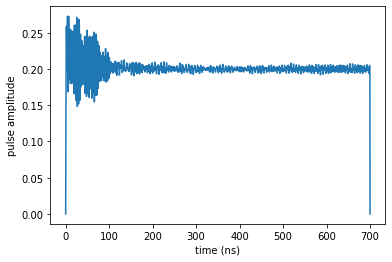

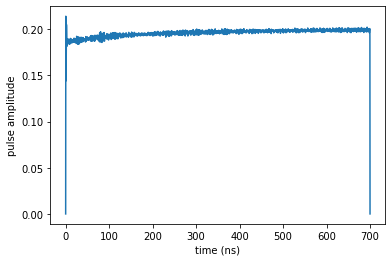

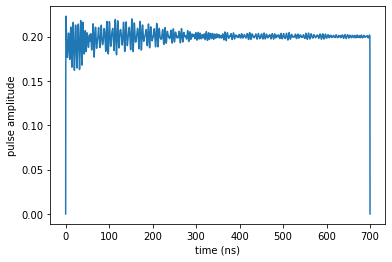

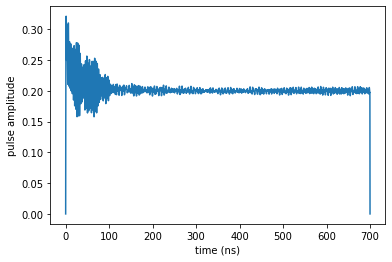

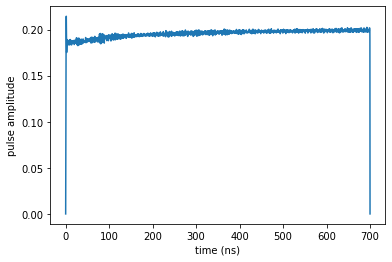

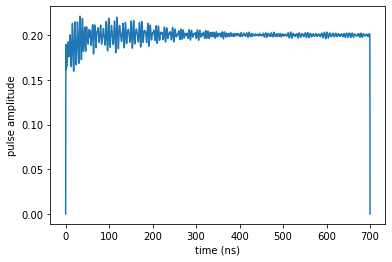

In [23]:
plot_pulse(opt_result.optimized_controls[0], tlist)

plot_pulse(opt_result.optimized_controls[1], tlist)

plot_pulse(opt_result.optimized_controls[2], tlist)

plot_pulse(opt_result.optimized_controls[3], tlist)

plot_pulse(opt_result.optimized_controls[4], tlist)

plot_pulse(opt_result.optimized_controls[5], tlist)

In [24]:
opt_dynamics1 = opt_result.optimized_objectives[0].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])

opt_dynamics2 = opt_result.optimized_objectives[1].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])
opt_dynamics3 = opt_result.optimized_objectives[2].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])

opt_dynamics4 = opt_result.optimized_objectives[3].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])
opt_dynamics5 = opt_result.optimized_objectives[4].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])
opt_dynamics6 = opt_result.optimized_objectives[5].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])

opt_dynamics7 = opt_result.optimized_objectives[6].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])
opt_dynamics8 = opt_result.optimized_objectives[7].mesolve(
    tlist, e_ops=[proj000, proj001, proj010, proj011, proj100, proj101, proj110, proj111])


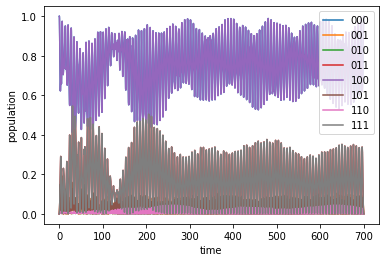

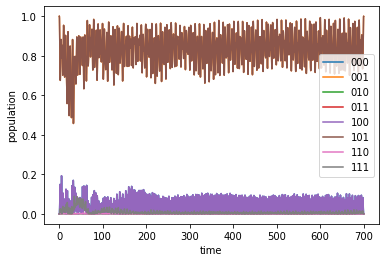

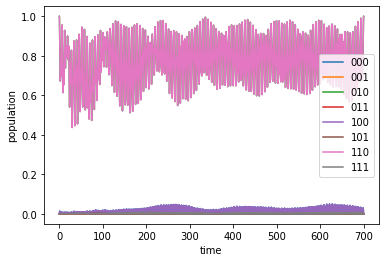

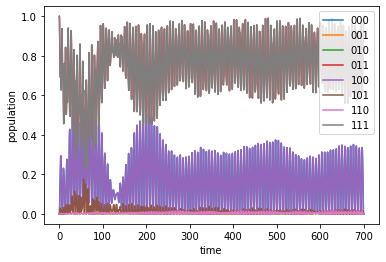

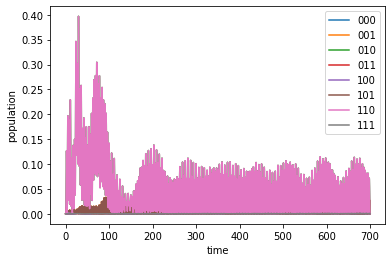

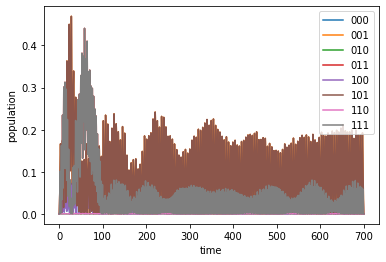

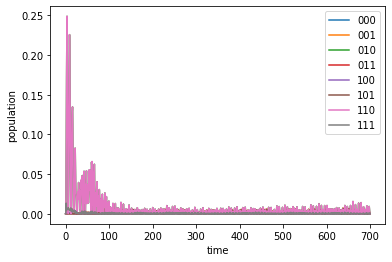

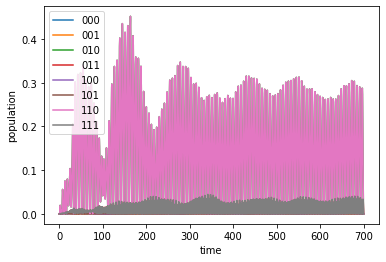

In [25]:
plot_population(opt_dynamics1)
plot_population(opt_dynamics2)
plot_population(opt_dynamics3)
plot_population(opt_dynamics4)
plot_population(opt_dynamics5)
plot_population(opt_dynamics6)
plot_population(opt_dynamics7)
plot_population(opt_dynamics8)

In [27]:
t_conv_toff_J2_6K=[]


t_sec = 0

for i in range (len(iter_sec_toff_J2_6K)):
    t_sec = iter_sec_toff_J2_6K[i] + t_sec
    t_conv_toff_J2_6K.append(t_sec)

In [28]:
t_conv_toff_J2_6K

[350, 1055, 1675, 2342, 2984, 3761, 4449, 5088]

In [29]:
t_conv_th_J2_6K=[]


t_h = 0

for i in range (len(t_conv_toff_J2_6K)):
    t_h = t_conv_toff_J2_6K[i]/3600 
    t_conv_th_J2_6K.append(t_h)

In [30]:
t_conv_th_J2_6K

[0.09722222222222222,
 0.29305555555555557,
 0.4652777777777778,
 0.6505555555555556,
 0.8288888888888889,
 1.0447222222222223,
 1.2358333333333333,
 1.4133333333333333]

In [31]:
Timetoff_J2_6K= np.linspace(0, 700, len(t_conv_toff_J2_6K))

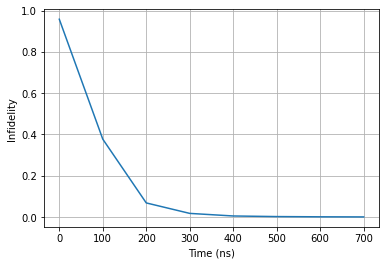

In [32]:
plt.plot(Timetoff_J2_6K, J_F_toff_J2_6K)
#plot_conv(J_F_100_1K[i], t_conv_100_1K[i])
plt.grid('on')
plt.xlabel("Time (ns)")
plt.ylabel("Infidelity")
#plt.title('Krotov')
#plt.legend()
plt.label=('Krotov')
#plt.savefig('ConvPlots5.png')

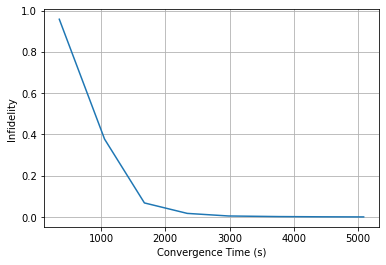

In [33]:
plt.plot(t_conv_toff_J2_6K, J_F_toff_J2_6K)
plt.grid('on')
plt.xlabel("Convergence Time (s)")
plt.ylabel("Infidelity")
#plt.title('Krotov')
#plt.legend()
plt.label=('GRAPE')
#plt.savefig('ConvPlots5.png')

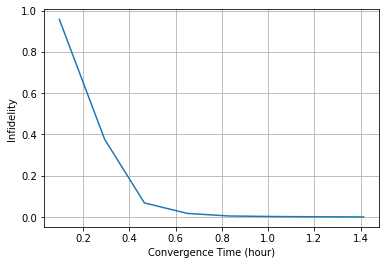

In [34]:
plt.plot(t_conv_th_J2_6K, J_F_toff_J2_6K)
plt.grid('on')
plt.xlabel("Convergence Time (hour)")
plt.ylabel("Infidelity")
#plt.title('Krotov')
#plt.legend()
plt.label=('GRAPE')
#plt.savefig('ConvPlots5.png')